# AutoRegressive and ARIMA 

In [93]:
import pandas as pd
from pandas import datetime

In [94]:
def parser(x):
    return datetime.strptime(x,'%Y-%m') # here we change data in better date format

In [95]:
sales = pd.read_csv("sales-cars.csv",index_col=0,parse_dates=[0],date_parser=parser)

In [96]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


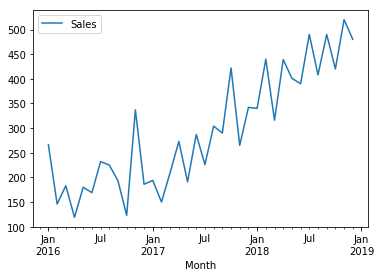

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
sales.plot()

In [98]:
#Because after the observing graph we come to conclusion this is non stationary date so inorder to make stationary we just 
#take difference b/w two consecutive rows then we will got statinary on that data we can perform our models.

In [99]:
sales_diff = sales.diff(periods=1)# Heres periods function has done same thing we have talked about.

In [100]:
sales_diff = sales_diff[1:]

In [101]:
sales_diff.head()# integreted order of one ,denoted by d(for diff),one of the parameter of arima model

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [102]:
# Looking for another approach Autocorrelation.
# In this process.we just see correlation b/w data and it's time lag for example
sales.shift(1).head() # this is our time lag and we just need to see correlation b/w them.

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0


In [103]:
sales.head() 

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [104]:
from statsmodels.graphics.tsaplots import plot_acf

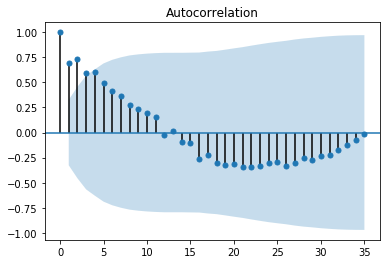

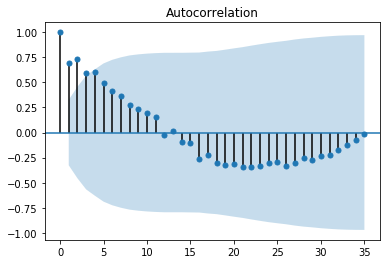

In [105]:
plot_acf(sales) # below given show correlation current data with past self.

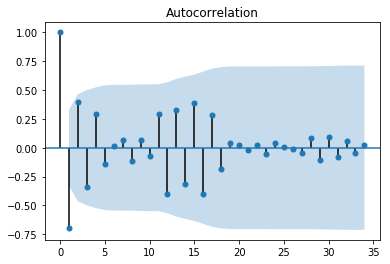

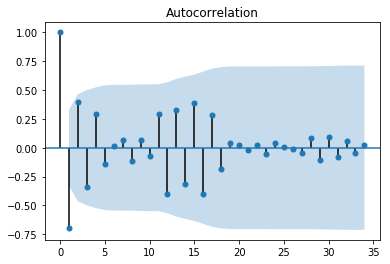

In [106]:
plot_acf(sales_diff)

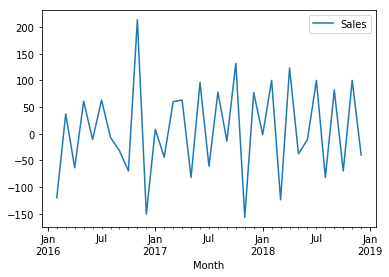

In [107]:
sales_diff.plot() # Here we can see this is stationary data so now we can apply models.

In [108]:
X = sales.values
train = X[0:27]# for training 
test = X[26:]
predictions = []

# Aurorgressive AR model

In [109]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [110]:
model_ar = AR(train)

In [111]:
model_ar_fit = model_ar.fit()

In [112]:
predictions = model_ar_fit.predict(start=26,end=36)

In [113]:
test

array([[316],
       [439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

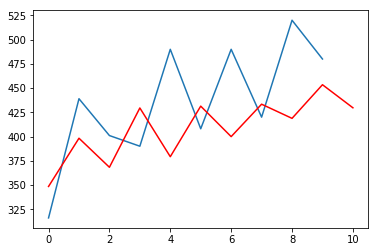

In [114]:
plt.plot(test)
plt.plot(predictions,color = "red")

# ARIMA model

In [115]:
from statsmodels.tsa.arima_model import ARIMA

In [116]:
#p,d,q p= periods taken for auto regrssive model for exampel only take onemonth or two month  to predict current sales
# d = Integrated order,differnce 
#q = instead of past data we take errors,perios in moving average.

In [134]:
model_arima = ARIMA(train,order=(4,2,1))

In [135]:
model_arima_fit = model_arima.fit()

In [136]:
predictions =model_arima_fit.forecast(steps=9)[0]
predictions

array([419.86225603, 399.60371276, 480.05791757, 431.16698136,
       488.80144733, 488.0765964 , 543.45038072, 535.49540863,
       575.01650182])

In [137]:
model_ar_fit.aic # less value of aic means better models

9.193932045571167

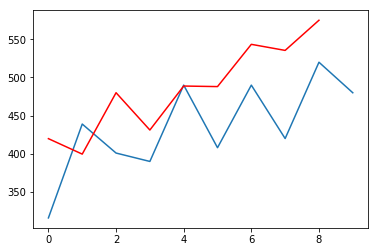

In [138]:
plt.plot(test)
plt.plot(predictions,color="red")

In [131]:
# import itertools
# p=q=d=range(0,5)
# pdq = list(itertools.product(p,d,q))
# pdq

In [130]:
"""
For pdq  hit and try method to get aic less values
"""

# import warnings
# warnings.filterwarnings('ignore')
# for param in pdq:
#     try:
#         model_arima = ARIMA(train,order=param)
#         model_arima_fit = model_arima.fit()
#         print(param,model_ar_fit.aic)
#     except:
#         continue 